In [2]:
from pathlib import Path
BASE_DIR = Path().resolve()
import sys
sys.path.append(str(BASE_DIR.parent / 'scr'))

from dataset_generator import variables, generar_dataset

In [3]:
Nx = 50
Ny = 50
dx = 0.05
dy = 0.05

generar_dataset(10, Nx, Ny, dx, dy,'dataset_10_test')

Se tienen 0/10 muestras generadas.

Filtrado completado:
Muestras originales: 10
Muestras después del filtrado: 8
Se creo la carpeta: C:\Users\Royer Condori\OneDrive\Documentos\ProyectoFinalModelado\data\dataset_10_test


8

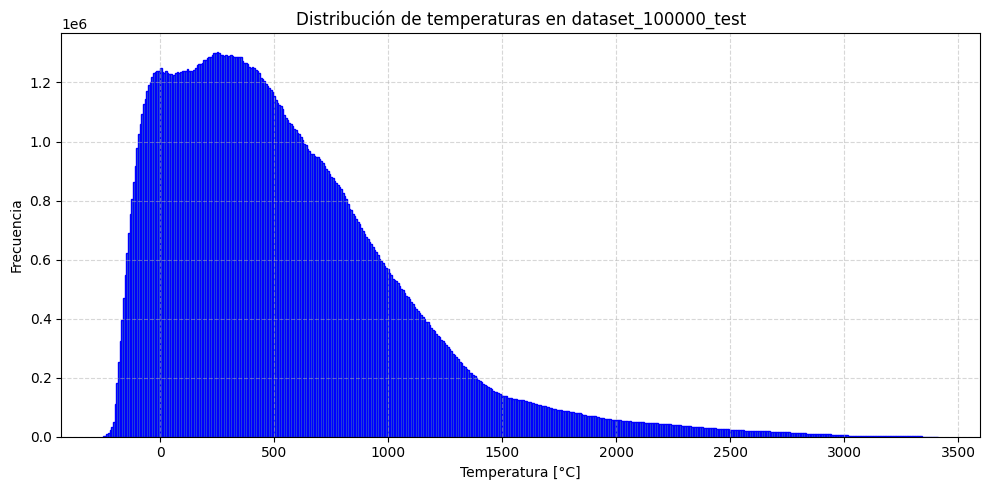

Estadísticas generales de dataset_100000_test:
Temperatura mínima: -249.98 °C
Temperatura máxima: 3411.75 °C
Temperatura media: 542.51 °C
Temperatura std: 514.39


In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
from utils import graficarChapa
import matplotlib.pyplot as plt

# ---------------- CONFIGURACIÓN ----------------
BASE_DIR = Path().resolve()

folder_name = 'dataset_100000_test'
Y_path = BASE_DIR.parent / 'data' / folder_name / 'Y.npy'
csv_path = BASE_DIR.parent / 'data' / folder_name / 'dataset_variables.csv'

# ---------------- CARGA DE DATOS ----------------
Y_data = np.load(Y_path).astype(np.float32)
df_registros = pd.read_csv(csv_path, sep=';')

Y_flat = Y_data.flatten()

plt.figure(figsize=(10,5))
plt.hist(Y_flat, bins=500, color='steelblue', edgecolor='blue')
plt.title(f"Distribución de temperaturas en {folder_name}")
plt.xlabel("Temperatura [°C]")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(f"Estadísticas generales de {folder_name}:")
print(f"Temperatura mínima: {Y_flat.min():.2f} °C")
print(f"Temperatura máxima: {Y_flat.max():.2f} °C")
print(f"Temperatura media: {Y_flat.mean():.2f} °C")
print(f"Temperatura std: {Y_flat.std():.2f}")

mins = Y_data.min(axis=1)
maxs = Y_data.max(axis=1)
means = Y_data.mean(axis=1)
stds = Y_data.std(axis=1)

target_min = mins.mean()
target_max = maxs.mean()
target_mean = means.mean()
target_std = stds.mean()

# print("\nMostrando muestras más cercanas a los valores promedio del dataset:")

# # Encontrar índices más cercanos
# idx_min_closest = np.argmin(np.abs(mins - target_min))
# idx_max_closest = np.argmin(np.abs(maxs - target_max))
# idx_mean_closest = np.argmin(np.abs(means - target_mean))
# idx_std_closest = np.argmin(np.abs(stds - target_std))

# # Función auxiliar para mostrar información
# def mostrar_info(idx, descripcion):
#     print(f"\n{descripcion} en índice: {idx}")
#     print(f"Temperatura mínima: {mins[idx]:.2f} °C")
#     print(f"Temperatura máxima: {maxs[idx]:.2f} °C")
#     print(f"Temperatura media: {means[idx]:.2f} °C")
#     print(f"Temperatura std: {stds[idx]:.2f}")

#     print("\nCondiciones de borde y material de la muestra:")
#     display(df_registros.iloc[idx])

#     Y_sample = Y_data[idx].reshape(50, 50)
#     graficarChapa(Y_sample, 50, 50)

# # Mostrar cada muestra más cercana
# mostrar_info(idx_min_closest, "Muestra más cercana por temperatura mínima promedio")
# mostrar_info(idx_max_closest, "Muestra más cercana por temperatura máxima promedio")
# mostrar_info(idx_mean_closest, "Muestra más cercana por temperatura media promedio")
# mostrar_info(idx_std_closest, "Muestra más cercana por temperatura std promedio")
